In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
import time
from IPython import display
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.titlepad'] = 75 
plt.rcParams['axes.labelpad'] = 12 

In [2]:
n = 3e22  #1/cm3
sigD = 10**-14.1  #cm2  general destruction CS
gma = 10**11.3  #1/eV/cm2
T = 80  #K  ice temperature
aa = 0.012  #K-1
Gp0 = sigD*gma  #eV-1  G-value at low T
Gp = Gp0*np.exp(-aa*T)  #eV-1  G-value
     #a = (1e8*sigD/n)*gma*exp(-aa*T);%5e-18 #  %cm2A/eV   %times SP yields creation CS (not for photons)

In [3]:
#electrons
m_e = 9.11e-31  #kg
c = 2.998e8  #m/s

In [4]:
#Kappa distribution for low energy
def f_kap(v, n, w, kappa):
    return (n*scipy.special.gamma(kappa + 1)/(((w*np.sqrt(np.pi*kappa))**3)*scipy.special.gamma(kappa - 0.5)))*(1 + (v**2)/(kappa*(w**2)))**(-kappa - 1) #cm^-6 s^3

#distribution for high energy
def j(j_0, E, a, b, E_0):
    return (j_0*E**a) * (1 + E/E_0)**b     #keV^-1 cm^-2 s^-1 sr^-1
    
#set the values for energy
E_vals = np.logspace(-4,7,10000)
N_E = len(E_vals)
dE = np.zeros(N_E-1)
for i in range (0, N_E - 1):
    dE[i] = E_vals[i+1] - E_vals[i]       
    
#Constants
k = 1.381 * 10**-16 #cm^2 g s^-2 K
m_e = 9.109 * 10**-28 #g
m_p = 1.661 * 10**-24 #g
k_b = 8.617 * 10**-5 #ev/K
erg = 6.2415*10**11 #eV/erg
c = 3.0 * 10**10 #cm/s
    
#Electrons - Ben    
kappa = 6
Te_low = 10/erg #erg
ne_low = (7.55 * 10**7)/(100**3) #cm^-3

#Calculate velocities
w_low = np.sqrt(2*Te_low/m_e) #cm/s
v_low = c*np.sqrt(1 - 1/(((E_vals/erg)/(m_e*c**2) + 1)**2))

j_low = np.pi * (v_low*v_low/m_e) * f_kap(v_low,ne_low,w_low,kappa)* (100**2)/erg #get rid of sr^-1, then cm^2 s^-2 g^-1 * cm^-6 s^3 = s cm^-4 g^-1 = erg^-1 s^-1 cm^-2 * cm^2/m^2 * erg/eV = eV^-1 m^-2 s^-1

#high energy
j_0 = 14000 #/keV cm^2 s sr
E_0 = 1.05
a = 1.2
b = -7

j_high = np.pi * ((10**4)/1000) * j(j_0, (E_vals*10**-6), a, b, E_0) #converts cm^-2 to m^-2 and keV to eV




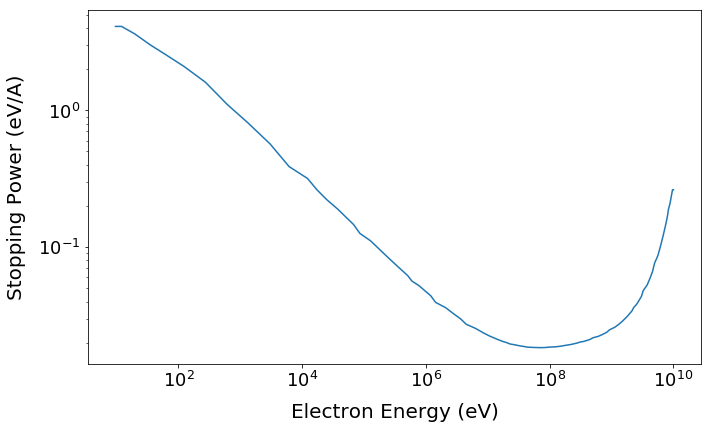

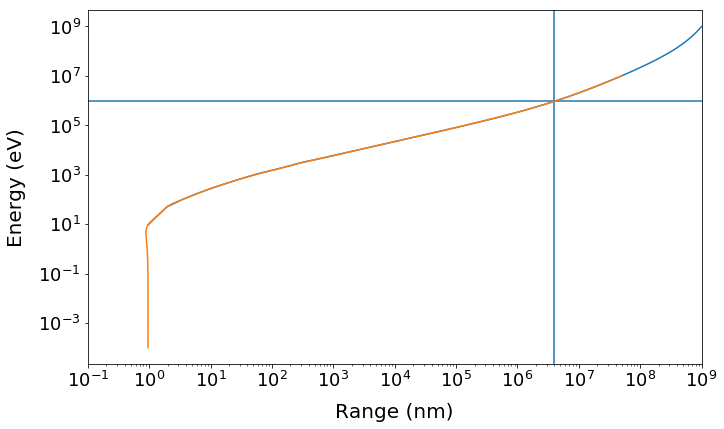

In [5]:
#e stopping power
electrons = np.loadtxt('e_ranges')  #Angstrom vs eV  in water ice

#calculating dE
E = electrons[:, 0]
dE = (E[2:] - E[0:-2])/2
dE = np.append(dE[0], dE)
dE = np.append(dE, dE[-1])

#calculate dx in A
x = electrons[:, 1]
dx = (x[2:] - x[0:-2])/2
dx = np.append(dx[0], dx)
dx = np.append(dx, dx[-1])

#Calculate stopping power
SP = (dE/dx)#*1e-6*1e-8  #eV/A
# # sigCe = a*SP;  %cm2  electron H2O2 creation CS

#E_int = np.log10(np.append(0,E)),
#SP_int =  np.log10(np.append(SP[0],SP))
#f_rng = scipy.interpolate.splrep(np.append(0,E),np.append(x[0], x))
#f_SP = scipy.interpolate.splrep(np.append(0,E),np.append(SP[0], SP))
f_SP = scipy.interpolate.interp1d(np.append(0,E),np.append(SP[0], SP), kind = 'cubic')
f_rng = scipy.interpolate.interp1d(np.append(0,E),np.append(x[0], x), kind = 'cubic')
rng = f_rng(E_vals)

fig1 = plt.figure(1)
fig1.set_figheight(6.5)
fig1.set_figwidth(11)
plt.loglog(x, SP)
#plt.plot(E_int,SP_int)
#plt.xlim(10**0, 10**10)
#plt.ylim(-2, 1)
plt.xlabel('Electron Energy (eV)')
plt.ylabel('Stopping Power (eV/A)')
#plt.ylim(10**-2, 10**1)
plt.show()

fig2 = plt.figure(2)
fig2.set_figheight(6.5)
fig2.set_figwidth(11)
plt.axhline(1e6)
plt.axvline(4e6)
plt.loglog(x*0.1, E)
plt.loglog(rng*0.1, E_vals)
plt.xlim((10**0)*0.1, (10**10)*0.1)
#plt.ylim(10**-2, 10**1)
plt.xlabel('Range (nm)')
plt.ylabel('Energy (eV)')
plt.show()



In [6]:
(4e6)*1e-7

0.39999999999999997

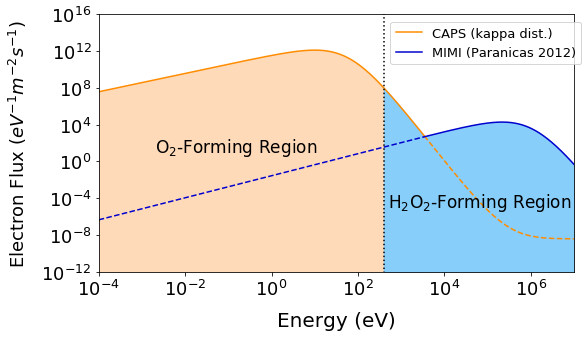

In [7]:
y_lower = np.zeros(6001)
y_lower[:] = 10**-12

y_higher = np.zeros(len(E_vals)-6001)
y_higher[:] = 10**-12
y_higher2 = np.zeros(6850-6001)
y_higher2[:] = 1e-12

#calculate range for energy values
E_plot = np.array([400, 1000, 10000, 1e7])
rng_axis = f_rng(E_plot)

fig1 = plt.figure(1)
fig1.set_figheight(6.5)
fig1.set_figwidth(10)

ax1 = fig1.add_subplot(111)
#ax2 = ax1.twiny()
#ax2.set_xticks(rng_axis)

#plt.clf()
#Low energy end - will not make anything
#ax1.plot(np.log10(E_vals[0:6001]), np.log10(E_vals[0:6001]*j_high[0:6001]), linestyle = '--', color = 'mediumblue')
# ax1.loglog(E_vals[0:6001], E_vals[0:6001]*j_high[0:6001], linestyle = '--', color = 'mediumblue')
# ax1.loglog(E_vals[0:6001], E_vals[0:6001]*j_low[0:6001], linestyle = '-', color = 'darkorange', label = 'low energy (kappa dist.)')
# #O2 Range
# ax1.loglog(E_vals[6001:], E_vals[6001:]*j_low[6001:], linestyle = '--', color = 'darkorange')
# #H2O2 range
# ax1.loglog(E_vals[6001:], E_vals[6001:]*j_high[6001:], label = 'high energy (Paranicas 2012)', color = 'mediumblue')
# ax1.loglog(E_vals[6001:], E_vals[6001:]*j_low[6001:], linestyle = '--', color = 'darkorange')
ax1.loglog(E_vals[0:6850], j_high[0:6850], linestyle = '--', color = 'mediumblue')
ax1.loglog(E_vals[0:6850], j_low[0:6850], linestyle = '-', color = 'darkorange', label = 'CAPS (kappa dist.)')
ax1.loglog(E_vals[6850:], j_low[6850:], linestyle = '--', color = 'darkorange')
ax1.loglog(E_vals[6850:], j_high[6850:], label = 'MIMI (Paranicas 2012)', color = 'mediumblue')
# plt.axvline(x=6e6)
# ax1.loglog(E_vals,j_low, 'k-')
# ax2.loglog(E_vals,j_high,'k-')
#Low energy limit to make O2
ax1.plot([400,400], [10**-13,10**19], 'k:')
# ax1.fill_between(E_vals[0:6001], y_lower, E_vals[0:6001]*j_low[0:6001], color = 'peachpuff')
# ax1.fill_between(E_vals[6001:], y_higher, E_vals[6001:]*j_high[6001:], color = 'lightskyblue')
ax1.fill_between(E_vals[0:6001], y_lower, j_low[0:6001], color = 'peachpuff')
ax1.fill_between(E_vals[6001:], y_higher, j_high[6001:], color = 'lightskyblue')
ax1.fill_between(E_vals[6001:6850], y_higher2, j_low[6001:6850], color = 'lightskyblue')

plt.text(2e-3,1e1, 'O$_2$-Forming Region', size=17)
plt.text(5e2,1e-5, 'H$_2$O$_2$-Forming Region', size=17)

#ax1.plot([E_vals[6850],E_vals[6850]], [10**-13,10**19], 'k:')

ax1.set_ylabel(r'Electron Flux ($eV^{-1}m^{-2}s^{-1}}$)', size = 18)
ax1.set_xlabel('Energy (eV)')
#ax2.set_xlabel('Log Range ($\AA$)')
#plt.title('Electron Distribution')
ax1.set_xlim(1e-4, 1e7)
ax1.set_ylim(10**-12, 10**16)
plt.subplots_adjust(left=0.17, right=0.83, top=0.7, bottom=0.15)
#plt.legend(bbox_to_anchor=(1,1),prop={'size': 13})
ax1.legend(bbox_to_anchor=(0.6,0.78), prop={'size': 13})
#plt.grid()
#plt.title('Fig. 2. Incident Energy Spectrum at Enceladus')
plt.savefig('ElectronDist_proposal.png')
plt.show()

In [8]:
E_vals[6001]

399.7239551890515

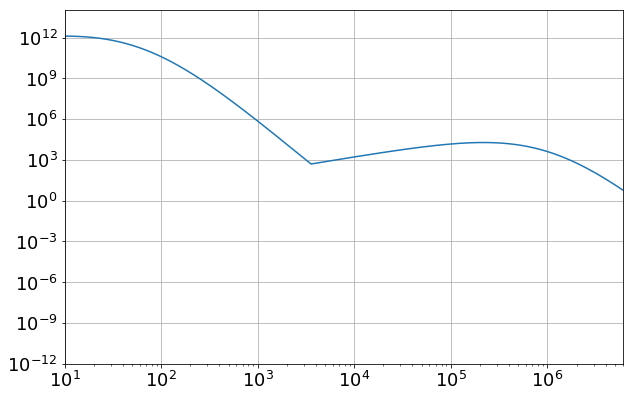

In [9]:
#Now add the two distributions to get the flux values
idx = np.argwhere(np.diff(np.sign(j_high - j_low))).flatten()
F_total = np.append(j_low[0:6863],j_high[6863:])

#From Ben:
F_Ben = np.loadtxt('F') #1/m2/s/eV
E_Ben = np.loadtxt('E_vals_eV')

fig2 = plt.figure(2)
fig2.set_figheight(6.5)
fig2.set_figwidth(10)
plt.loglog(E_vals,F_total)
#plt.loglog(E_Ben,F_Ben)
plt.ylim(1e-12,1e14)
plt.xlim(1e1,6e6)
plt.grid()
plt.show()

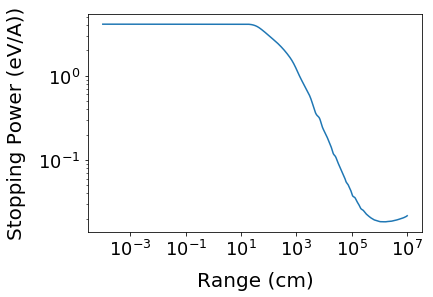

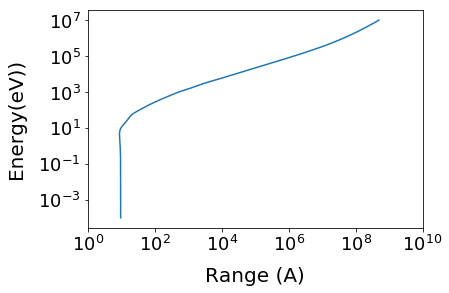

In [10]:
#Choose energy & flux pair

#Mine:
E = E_vals #eV #energy values at enceladus
F = F_total

#Ben's
# E = E_Ben
# F = F_Ben

#rng = interpolate.splev(E, f_rng) #Angstroms
rng = f_rng(E)
#log_SP_int = interpolate.splev(np.log10(E), f_SP)   
#SP_int = interpolate.splev(E, f_SP) 
#SP_int = 10**log_SP_int
SP_int = f_SP(E)
dE2 = (E[2:] - E[0:-2])/2
dE2 = np.append(dE2[0], dE2)
dE2 = np.append(dE2, dE2[-1])

#plt.loglog(rng*1e-8,SP_int)
plt.loglog(E,SP_int)
plt.xlabel('Range (cm)')
plt.ylabel('Stopping Power (eV/A))')
#plt.xlim(1e0,1e10)
#plt.ylim(1e-2,1e1)
plt.show()

plt.loglog(rng,E)
plt.xlabel('Range (A)')
plt.ylabel('Energy(eV))')
plt.xlim(1e0,1e10)
#plt.ylim(1e-2,1e1)
plt.show()

In [11]:
E

array([1.00000000e-04, 1.00253631e-04, 1.00507905e-04, ...,
       9.94946618e+06, 9.97470109e+06, 1.00000000e+07])

In [12]:
# #Create bins
# #xx = np.logspace(1, 9, 100000)*(1e-8);   # A to cm positions, up to the frozen-in depth
# #xx = np.logspace(-8,8.5,10000)*(1e-8)
# xx = np.arange(0,1e7,100)*(1e-8)
# dxx = (xx[2:]-xx[0:-2])/2
# dxx = np.append(dxx[0], dxx)
# dxx = np.append(dxx, dxx[-1])

In [13]:
# SP vs depth vs starting energy
# depth distribution of energy
#f_SPvl = scipy.interpolate.interp1d(E_int, SP_int) #curve fit for interp. SP values
#use this to interpolate reduced energy values in each bin

# Evl = E
# SPvl = SP_int #set stopping power for a given energy to integrated SP
# SPvls = np.zeros([len(SP_int),len(xx)])
# E_dist = np.zeros(len(xx))
# for jj in range(0,len(xx)):
#     SPvls[:,jj] = SPvl # assigns stopping powers for each energy to all depth bins, eV/A
#     #E_pos = Evl[Evl >= 0] #cuts negative energies, eV
#     Evl = Evl - SPvl*(1e8*dxx[jj]) #Energy in bin = E (eV) - dE/dx (eV/a) * dx (cm to A)
#     Evl[Evl < 0] = np.nan #set negative e values to nan for interpolation
#     E_dist[jj] = np.sum(Evl[Evl>0]) #total energy in a given bin
#     SPvl = f_SP(Evl) #Interpolate SP for reduced energy values to get adjusted stopping powers for each bin
#     SPvl = np.nan_to_num(SPvl) #turns nans back into 0's for math-ing

# #Get rid of negative values
# fig5 = plt.figure(5)
# fig5.set_figheight(6.5)
# fig5.set_figwidth(11)
# plt.plot(xx, E_dist)
# #plt.ylim(1.2*10**7,2.2*10**7)
# plt.xlabel('Depth (cm)')
# plt.ylabel('Total Deposited Energy (eV)')
# plt.show()

# # fig5 = plt.figure(5)
# # fig5.set_figheight(6.5)
# # fig5.set_figwidth(11)
# # plt.plot(xx, E_dist)
# # plt.xlabel('Depth (cm)')
# # plt.ylabel('Total Deposited Energy (eV)')
# # plt.show()

# print(E_dist)

/Users/cray/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/Users/cray/miniconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:687: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/cray/miniconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/cray/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


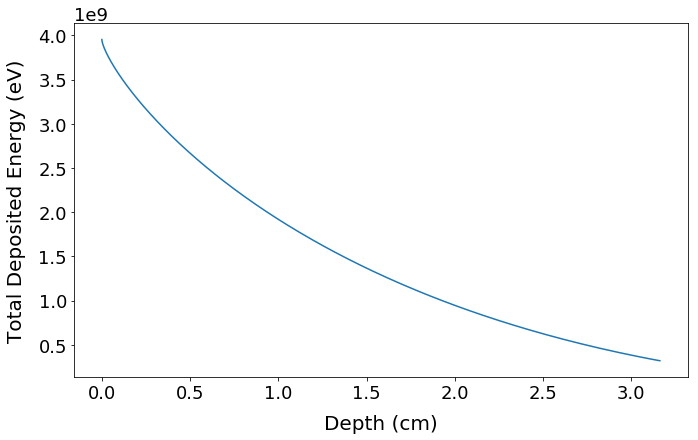

[3.95273895e+09 3.95273895e+09 3.95273895e+09 ... 3.51377760e+08
 3.36206532e+08 3.21430576e+08]


In [14]:
#Create bins
#xx = np.logspace(1, 9, 100000)*(1e-8);   # A to cm positions, up to the frozen-in depth
xx = np.logspace(-8,8.5,3000)*(1e-8)
#xx = np.arange(0,1e7,100)*(1e-8)
dxx = (xx[2:]-xx[0:-2])/2
dxx = np.append(dxx[0], dxx)
dxx = np.append(dxx, dxx[-1])

Evl = E
SPvl = SP_int #set stopping power for a given energy to integrated SP
SPvls = np.zeros([len(SP_int),len(xx)])
E_dist = np.zeros(len(xx))
for jj in range(0,len(xx)):
    SPvls[:,jj] = SPvl # assigns stopping powers for each energy to all depth bins, eV/A
    #E_pos = Evl[Evl >= 0] #cuts negative energies, eV
    Evl = Evl - SPvl*(1e8*dxx[jj]) #Energy in bin = E (eV) - dE/dx (eV/a) * dx (cm to A)
    Evl[Evl < 0] = np.nan #set negative e values to nan for interpolation
    E_dist[jj] = np.sum(Evl[Evl>0]) #total energy in a given bin
    #log_SPvl = interpolate.splev(np.log10(Evl), f_SP) 
    #log_SPvl = interpolate.splev(Evl, f_SP) 
    #SPvl = 10**log_SPvl
    SPvl = f_SP(Evl) #Interpolate SP for reduced energy values to get adjusted stopping powers for each bin
    SPvl = np.nan_to_num(SPvl) #turns nans back into 0's for math-ing
    
fig5 = plt.figure(5)
fig5.set_figheight(6.5)
fig5.set_figwidth(11)
plt.plot(xx, E_dist)
plt.xlabel('Depth (cm)')
plt.ylabel('Total Deposited Energy (eV)')
plt.show()

print(E_dist)

In [15]:
np.savetxt('dxx.txt', dxx, fmt='%.8e', delimiter=' ', newline='\n')



In [16]:
# loop over distribution
ff = np.zeros(len(xx))
create = 0*ff
destroy = 0*ff
#Anrm = sum(F.*dE2)/1e4;  %1/cm2/s  total particle Flux
for ii in range (1,len(F)):   
    flux_val = F[ii]/1e4  #1/cm2/eV/s   particle flux per eV, 1e4 to convert m^2 to cm^2
    flux = flux_val*(SPvls[ii,:] > 0)  # cuts part of distribution that does not reach depth (negative or 0 stopping power)
    Prd = Gp*flux*SPvls[ii,:]*(1e8)  #1/cm3/s/eV  peroxide production rate per unit volume PER eV (vs depth)
    #G value (ev^-1) * flux (cm^-2 * ev^-1 * s) * SP (eV/A to cm) = H2O2?/cm^3/s/eV
    create = create + Prd*dE2[ii];  #Prd* eV = H2O2/cm3/s  peroxide production rate per unit volume per second
    destroy = destroy + sigD*flux*dE2[ii];  #cross section (cm^2) * flux (H2O2/cm2/eV/s) * eV = H2O2/s, destruction rate per peroxide molecule

#np.savetxt('peroxide_create.txt', create, fmt = '%e')
#np.savetxt('peroxide_destroyed.txt', destroy, fmt = '%e')
len(Prd)



3000

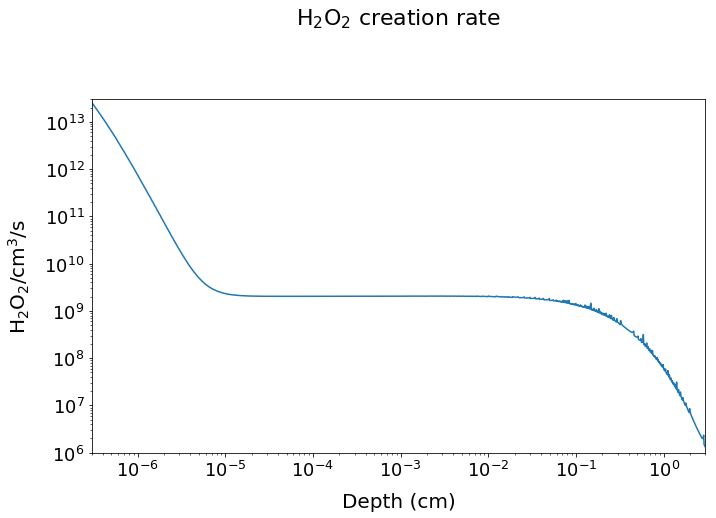

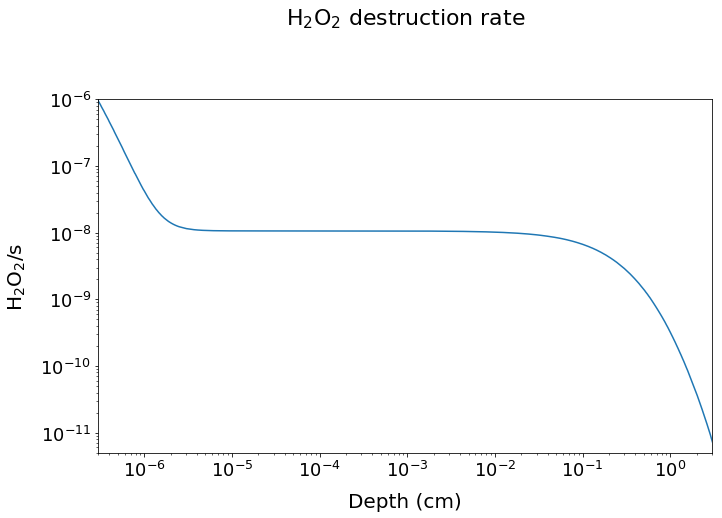

In [17]:
fig6 = plt.figure(6)
fig6.set_figheight(6.5)
fig6.set_figwidth(11)
plt.loglog(xx,create)
plt.xlim(3e-7,3)
plt.ylim(1e6,3e13)
plt.title("H$_2$O$_2$ creation rate")
plt.xlabel('Depth (cm)')
plt.ylabel('H$_2$O$_2$/cm$^3$/s')
#plt.ylim(5e8,2e9)
#plt.xlim(5e-5,1e-1)
plt.show()

fig7 = plt.figure(7)
fig7.set_figheight(6.5)
fig7.set_figwidth(11)
plt.loglog(xx,destroy)
plt.xlim(3e-7,3)
plt.ylim(5e-12,1e-6)
plt.title("H$_2$O$_2$ destruction rate")
plt.xlabel('Depth (cm)')
plt.ylabel('H$_2$O$_2$/s')
#plt.ylim(5e8,2e9)
#plt.xlim(5e-5,1e-1)
plt.show()

In [18]:
create_smoothed = create
for i in range(0,1):
    good_indices = []
    for j in range(0,len(create_smoothed)-1):
        if create_smoothed[j+1] < create_smoothed[j]:
            good_indices.append(j+1)
    good_indices = np.append(0,good_indices)
    f_smooth = scipy.interpolate.interp1d(xx[good_indices],create_smoothed[good_indices])
    create_smoothed = f_smooth(xx)
#     plt.loglog(xx,create_smoothed, linewidth=3)
#     plt.xlim(1e-2,3)
#     plt.ylim(10**5.9,10**10)                      

# fig6 = plt.figure(6)
# fig6.set_figheight(6.5)
# fig6.set_figwidth(11)
# plt.loglog(xx,create,'.', label = 'original', markersize = 3)
# plt.loglog(xx,create_smoothed,linewidth = 5)
# #plt.loglog(xx[2350:], create_new)
# plt.xlim(1e-3,3)
# plt.ylim(10**5.9,10**10)
# plt.title("Peroxide Creation Rate")
# plt.xlabel('Depth (cm)')
# plt.ylabel('H$_2$O$_2$/cm$^3$/s')
# plt.legend(prop={'size': 13})
# #plt.ylim(5e8,2e9)
# #plt.xlim(1e-2,3e-2)
# plt.show()

y = np.log10(create_smoothed[2100:])
x = np.log10(xx[2100:])

def f(x,a,b,c):
    return c - a*np.exp(b*x)
init_vals = [1.45,1.75,9.3]
popt, pval = scipy.optimize.curve_fit(f,x,y,p0 = init_vals)

idx = np.argwhere(np.diff(np.sign(create_smoothed[2100:] - 10**f(x, *popt)))).flatten()

#create_smoothed_fit = np.append(create_smoothed[0:2100],10**f(x, *popt))

fig7 = plt.figure(7)
fig7.set_figheight(6.5)
fig7.set_figwidth(11)
#plt.loglog(xx,create,'.', label = 'original', markersize = 3)
plt.loglog(xx,create_smoothed,'.', label = 'smoothed', markersize = 3)
#plt.loglog(xx,create_smoothed_fit, label = 'smoothed & fit')
plt.xlim(1e-5,3)
plt.ylim(9e5,1e10)
plt.title("Peroxide Creation Rate")
plt.xlabel('Depth (cm)')
plt.ylabel('H$_2$O$_2$/cm$^3$/s')
plt.legend(prop={'size': 13})
plt.show()

AttributeError: module 'scipy' has no attribute 'optimize'

In [ ]:

x = xx[2350:]
y = destroy[2350:]

init_vals = [1e-8,4]
def f(x,a,b):
    return a*np.exp(-b*x)
popt, pval = scipy.optimize.curve_fit(f,x,y,p0 = init_vals)

#for i in range(0,len(destroy[2350:])):
good_indices = []
destroy_end = destroy[2350:]
xx_end = xx[2350:]
for j in range(0,len(destroy_end)-1):
    if destroy_end[j+1] < destroy_end[j]:
        good_indices.append(j+1)
good_indices = np.append(0,good_indices)
good_indices = np.append(good_indices, len(destroy_end)-1)
f_smooth = scipy.interpolate.interp1d(xx_end[good_indices],destroy_end[good_indices])
destroy_end_smoothed = f_smooth(xx[2350:])

fig8 = plt.figure(8)
fig8.set_figheight(6.5)
fig8.set_figwidth(11)
#plt.loglog(x,y,'.', label = 'original', markersize = 3)
plt.loglog(xx[2350:],destroy_end_smoothed)
#plt.plot(x, (1.06e-8)*np.exp(-4*x))
#plt.loglog(x, f(x,popt[0],popt[1]))
#plt.xlim(0,3)
#plt.ylim(4e-12,3e-8)
plt.title("Peroxide Destruction Rate")
plt.xlabel('Depth (cm)')
plt.ylabel('H$_2$O$_2$/cm$^3$/s')
plt.legend(prop={'size': 13})
plt.show()



In [ ]:
create_smoothed = create[2350:]
xx_end = xx[2350:]

# for i in range(0,1):
#     good_indices = []
#     for j in range(0,len(create_smoothed)-1):
#         if create_smoothed[j+1] < 0.98*create_smoothed[j]:
#             good_indices.append(j+1)
#     good_indices = np.append(0,good_indices)
#     good_indices = np.append(good_indices, len(create_smoothed)-1)
#     f_smooth = scipy.interpolate.interp1d(xx_end[good_indices], create_smoothed[good_indices])
#     create_smoothed = f_smooth(xx_end)
# print(len(create_smoothed))
# print(len(xx_end))


x = np.log10(xx[2350:])
y0 = np.log10(create_smoothed[0]) + 1.15*np.exp(1.8*x[0])

# init_vals = [y0, 1.4, 0.8]
# def f(x,a,b,c):
#      return a - b*(10**(c*x))
# popt, pval = scipy.optimize.curve_fit(f,x_plot,y,p0 = init_vals)

#create_end_smoothed = a - 1.5*10**(0.7*x)
points = np.array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
       390, 420, 440, 480, 510, 540, 570, 600, 630, 649])
f_create = scipy.interpolate.interp1d(x[points],np.log10(create_smoothed[points]))
create_new = f_create(x)


fig8 = plt.figure(8)
fig8.set_figheight(6.5)
fig8.set_figwidth(11)
#plt.plot(x,y,'.', label = 'original', markersize = 3)
#plt.plot(x, np.log10(create_smoothed), '.', markersize = 3)
#plt.plot(x, np.log10(create_smoothed[0]) - 1.4*10**(0.8*x))
#plt.plot(x, create_new, '-', markersize = 5, color = 'green')
plt.plot(x[points], np.log10(create_smoothed[points]), '.', markersize = 5, color = 'green')
plt.plot(x, y0 - 1.5*np.exp(1.8*x))
#plt.plot(x, f(x,popt[0],popt[1],popt[2]))
#plt.xlim(0,3)
#plt.ylim(4e-12,3e-8)
plt.title("Peroxide Creation Rate")
plt.xlabel('Depth (cm)')
plt.ylabel('H$_2$O$_2$/cm$^3$/s')
plt.legend(prop={'size': 13})
plt.show()


#create_end_smoothed = np.append(np.log10(create_smoothed[0:250]),y0 - 1.5*np.exp(1.6*x[250:]))

In [ ]:
x_data = x[points]
y_data = np.log10(create_smoothed[points])

p = np.poly1d(np.polyfit(x_data, y_data,6))

fig8 = plt.figure(8)
fig8.set_figheight(6.5)
fig8.set_figwidth(11)
#plt.plot(x_data, y_data, '.', markersize = 5, color = 'green')
plt.plot(x, p(x))
plt.plot(x[points], np.log10(create_smoothed[points]), '.', markersize = 5, color = 'green')
#plt.xlim(0,3)
#plt.ylim(4e-12,3e-8)
plt.title("Peroxide Creation Rate")
plt.xlabel('Depth (cm)')
plt.ylabel('H$_2$O$_2$/cm$^3$/s')
plt.legend(prop={'size': 13})
plt.show()

create_end_smoothed = p(x)

In [ ]:
print(len(create_end_smoothed))
print(len(xx_end))

In [19]:
destroy_smoothed = np.append(destroy[0:2350],destroy_end_smoothed)
fig9 = plt.figure(9)
fig9.set_figheight(6.5)
fig9.set_figwidth(11)
plt.loglog(xx,destroy_smoothed)
plt.xlim(3e-7,3)
plt.ylim(5e-12,1e-6)
plt.title("H$_2$O$_2$ destruction rate")
plt.xlabel('Depth (cm)')
plt.ylabel('H$_2$O$_2$/s')
#plt.ylim(5e8,2e9)
#plt.xlim(5e-5,1e-1)
plt.show()

log_create_smoothed = np.append(np.log10(create[0:2350]), create_end_smoothed)
create_smoothed = 10**log_create_smoothed
fig10 = plt.figure(10)
fig10.set_figheight(6.5)
fig10.set_figwidth(11)
plt.loglog(xx,create_smoothed)
plt.xlim(3e-7,3)
plt.ylim(1e6,3e13)
plt.title("H$_2$O$_2$ creation rate")
plt.xlabel('Depth (cm)')
plt.ylabel('H$_2$O$_2$/cm$^3$/s')
#plt.ylim(5e8,2e9)
#plt.xlim(5e-5,1e-1)
plt.show()

NameError: name 'destroy_end_smoothed' is not defined

In [20]:
len(create_smoothed)

3000

In [21]:
n_p = create_smoothed/destroy_smoothed
concEq = n_p/n 

#Let's smooth this over too:
# n_p_smoothed = create
# for i in range(0,50):
#     good_indices = []
#     for j in range(0,len(create_smoothed)-1):
#         if create_smoothed[j+1] < create_smoothed[j]:
#             good_indices.append(j+1)
#     good_indices = np.append(0,good_indices)
#     f_smooth = scipy.interpolate.interp1d(xx[good_indices],create_smoothed[good_indices])
#     create_smoothed = f_smooth(xx)
#     plt.loglog(xx,create_smoothed, linewidth=3)
#     plt.xlim(1e-2,3)
#     plt.ylim(10**5.9,10**10)  
    
fig9 = plt.figure(9)
fig9.set_figheight(6.5)
fig9.set_figwidth(11)
plt.clf()
plt.loglog(xx, n_p)
plt.title("H$_2$O$_2$ Equilibrium Concentration")
plt.xlabel('Depth (m)')
plt.ylabel('Concentration')
plt.xlim(5e-5,3)
plt.ylim(1.65e17, 2.3e17)
plt.legend(prop={'size': 13})
plt.show()

NameError: name 'destroy_smoothed' is not defined

In [22]:
#For importing into oxidation code:

np.savetxt('peroxide_create.txt', create_smoothed, fmt = '%e')
np.savetxt('peroxide_destroy.txt', destroy, fmt = '%e')
np.savetxt('xx.txt', xx, fmt = '%e')
np.savetxt('dxx.txt', dxx, fmt = '%e')

In [23]:
#Integral Method
##double check solution by increasing energy flux 
# v*(np - np0) = Integral[(P - D*np)*dx] if dnpdt = 0
burial = (0.4/10)*3600*24*365 #cm/s

burial = np.asarray([10**-4, 10**-3, 10**-2, 10**-1, 0.5]) * 10**-3 #m/yr

npEq = n_p #equilibrium without burial
fct = 0.01 #smoothing factor

concEq = n_p/n
conc_all= np.zeros([len(burial),len(xx)])

for j in range(1,len(burial)):
    plt.figure(j)
    for i in range (0,5000):
        n_pNEW = (1/((burial[j]*100)/(365*24*3600)))*np.cumsum((create - destroy*n_p)*dxx)
        n_p = fct*n_pNEW + (1 - fct)*n_p
    
        # boundary condition
        n_p[0] = npEq[0]
        n_p[n_p < 0] = 0  # disallow negative concentration
        conc = n_p/n
        conc_all[j] = conc
    
        # plot
        if i%100 == 0:
            plt.clf()
            plt.loglog(xx, conc, '-o', mfc='none', label = 'buried')
            plt.loglog(xx, concEq, '-o', mfc='none', label = 'equilibrium')
            plt.xlabel('Distance(cm)')
            plt.ylabel('Concentration(cm$^{-3}$)')#VS cm
            plt.xlim(1e-8, 3e0)
            plt.ylim(1e-10, 3e0)
            plt.legend()
            display.display(plt.gcf())
            display.clear_output(wait=True)
#print(conc)
#print(concEq)

NameError: name 'n_p' is not defined

In [24]:
#Numerically:
#Let dnp/dt = P - Dn
#Time interval = 1yr

#with 10e-6cm bin size:
dt = (dxx[0]/(0.5/10))*365*24*3600 #seconds to deposit amt of ice in a bin
n_p[:] = 0

for i in range(0,50000):
    dnp_dt = create - destroy*n_p
    n_p = n_p + dnp_dt*dt #modify concentration with dnp_dt
    n_p[0] = 0 #deposit fresh ice on top
    n_p[1:] = n_p[0:-1] #shift down one bin
    n_p[n_p < 0] = 0
    conc = n_p/n

    if i%10000 == 0:  
        plt.clf()
        plt.loglog(xx, conc, '-o', mfc='none')
        plt.loglog(xx, concEq, '-o', mfc='none')        
        plt.xlabel('Distance(cm)')
        plt.ylabel('Concentration(cm$^{-3}$)')
        plt.xlim(1e-6, 1e0)
        plt.ylim(1e-10, 1e0)
        plt.legend()
        display.display(plt.gcf())
        display.clear_output(wait=True)
    
print(conc)

NameError: name 'n_p' is not defined

In [25]:
print(conc)

NameError: name 'conc' is not defined